<span style="font-family: Arial; font-weight:bold;font-size:3.0em;color:#0e92ea"> AllLife Bank Customer Segmentation 
********************************************************************************************************************************

## Description

### Context
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

 

### Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

 

### Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

### Data Dictionary

* Sl_No: Primary key of the records
* Customer Key: Customer identification number
* Average Credit Limit: Average credit limit of each customer for all credit cards
* Total credit cards: Total number of credit cards possessed by the customer
* Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
* Total visits online: Total number of visits or online logins made by the customer (yearly)
* Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

### Objectives:
1) Perform EDA.<br>
2) Apply Clustering Algorithms and mentions how many clusters are formed <br>
3) How are these segments different from each other? <br>
4) What are your recommendations to the bank on how to better market to and service these customers? <br>

********************************************************************************************************************************

# Import neccesary Libaries :

In [3]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from sklearn.cluster import AgglomerativeClustering 

In [3]:
data = pd.read_csv("Credit Card Customer Data.csv")

In [4]:
df = data.copy()

In [5]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')
print ("Features : \n\n", df.columns.tolist()) 
print ("*"*120,"\nMissing values :\n\n", df.isnull().sum().sort_values(ascending=False))
print( "*"*120,"\nPercentage of missing :\n\n", round(df.isna().sum() / df.isna().count() * 100, 2).sort_values(ascending=False)) 

There are 660 rows and 7 columns
Features : 

 ['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
************************************************************************************************************************ 
Missing values :

 Total_calls_made       0
Total_visits_online    0
Total_visits_bank      0
Total_Credit_Cards     0
Avg_Credit_Limit       0
Customer Key           0
Sl_No                  0
dtype: int64
************************************************************************************************************************ 
Percentage of missing :

 Total_calls_made       0.0
Total_visits_online    0.0
Total_visits_bank      0.0
Total_Credit_Cards     0.0
Avg_Credit_Limit       0.0
Customer Key           0.0
Sl_No                  0.0
dtype: float64


- There are total 7 columns and 660 observations in the dataset
- All the columns are of integer type . As observed , there is no missing values in the dataset.

In [8]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [9]:
#dropping the serial no. column as it does not hold any statistical significance
df.drop('Sl_No',axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


In [11]:
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


#### Inference
- Median of Total_Credit_Cards is 5 indicating most of the customers at the most have 5 credit cards.
- The average bank visits by a customer is twice and the online visits are also twice. 
********************************************************************************************************************************

## Exploratory Data Analysis-EDA

### Univariate Analysis

In [13]:
def diff_plots(df):
    fig, axes =plt.subplots(1,3,figsize=(20, 5))
    Name=df.name.upper()
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=15, fontweight='bold')
    sns.distplot(df,kde=True,color='Blue',ax=axes[0])
    axes[0].axvline(df.mean(), color='b', linestyle='--',linewidth=2)
    axes[0].axvline(df.median(), color='r', linestyle='solid', linewidth=2)
    axes[0].axvline(df.mode()[0],color='g',linestyle='dashed',linewidth=2)
    axes[0].legend({'Mean':df.mean(),'Median':df.median(),'Mode':df.mode()})
    sns.boxplot(x=df,showmeans=True, orient='h',color="purple",ax=axes[1])
    sns.violinplot(df,ax=axes[2],showmeans=True)

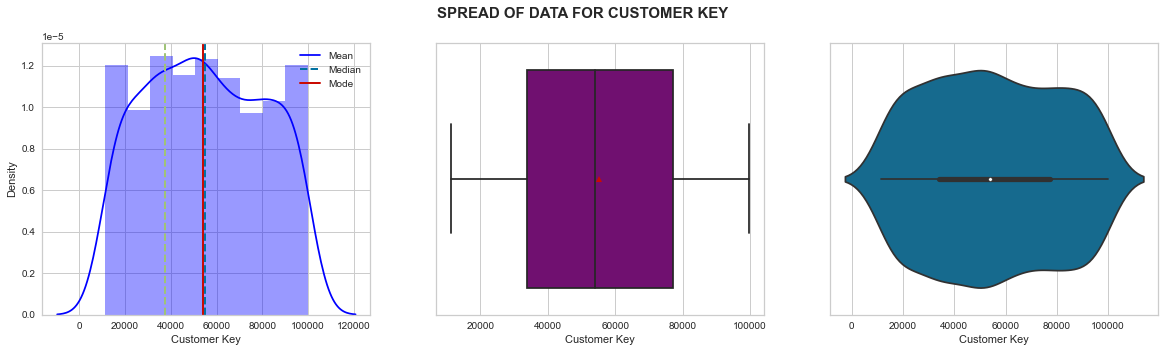

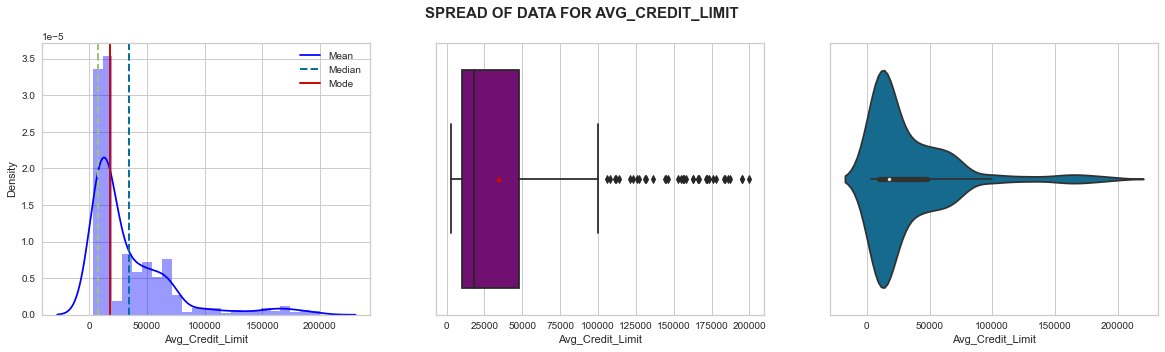

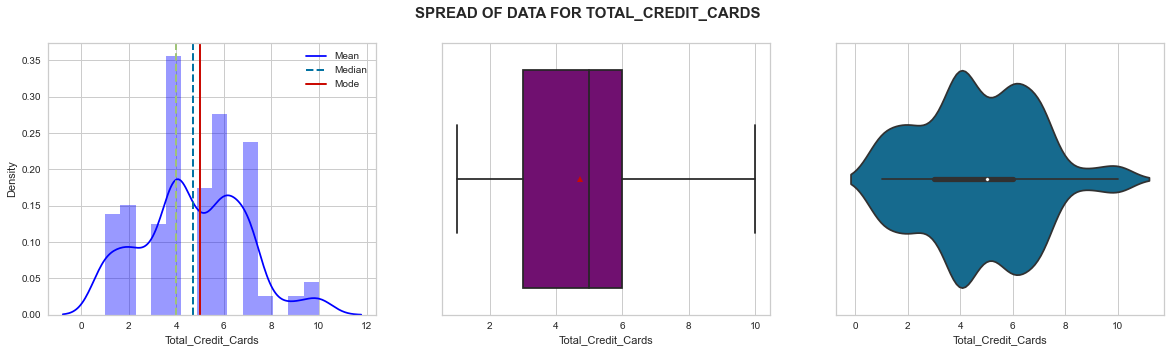

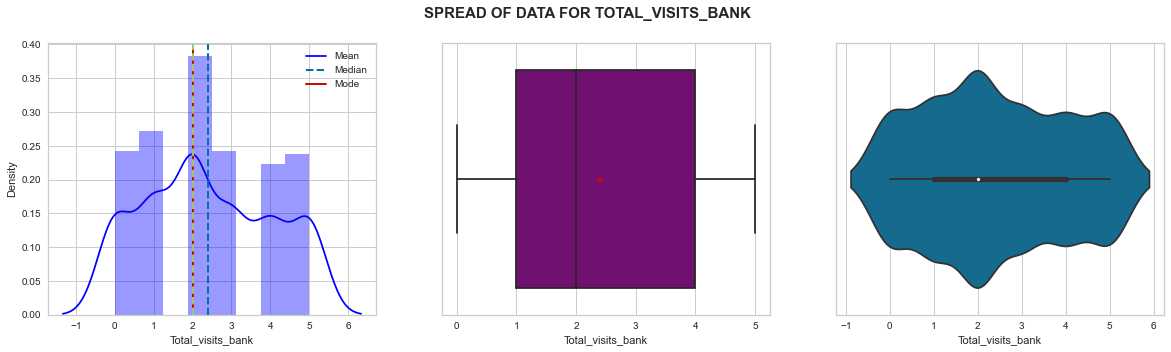

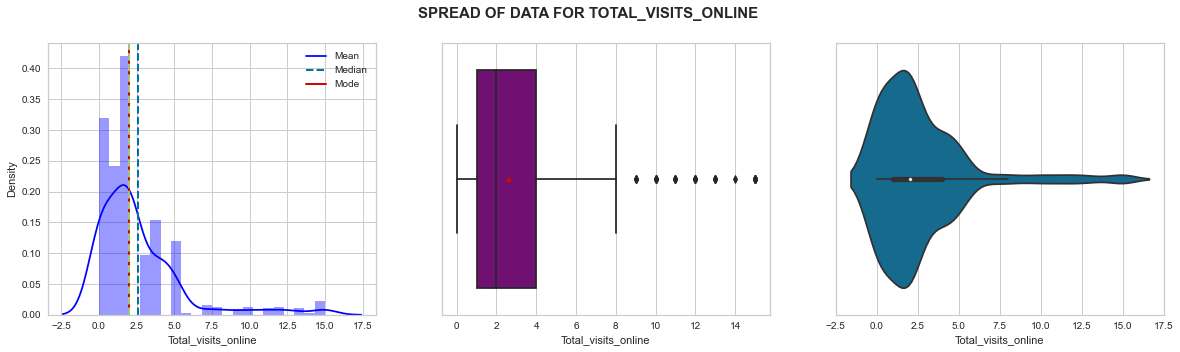

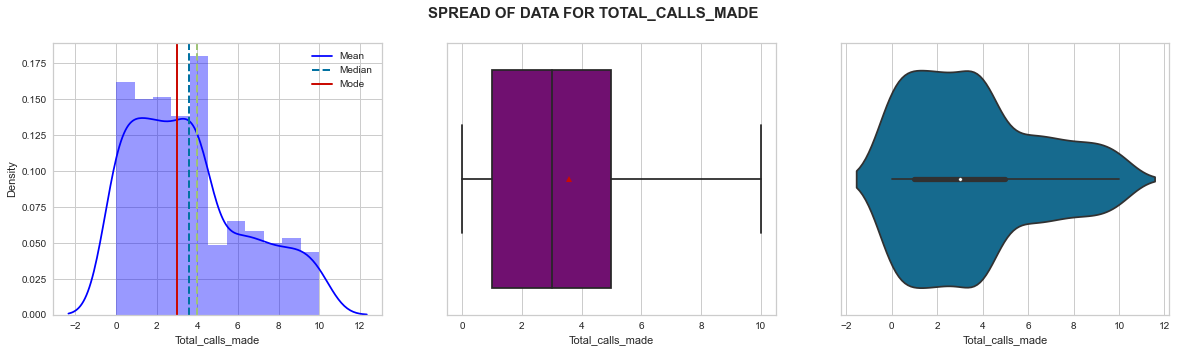

In [14]:
list_col=  df.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    diff_plots(df[list_col[i]])

#### Inference: 
* We don't have to look into the data spread for customer key
* From the **average credit limit** we can see that the data is right skewed with plenty of outliers. 
* The spread of total credit cards suggest the aveerage users have between 2 to 6 credit cards. 
* The highest bank visits are twice but there is no clear number as it might because of the age difference and the user flexibility of the customers. 
* Data spread of online visits by users suggest a lower usage of online support. Its more right skewed.
* On an average 3 calls are made per user. 

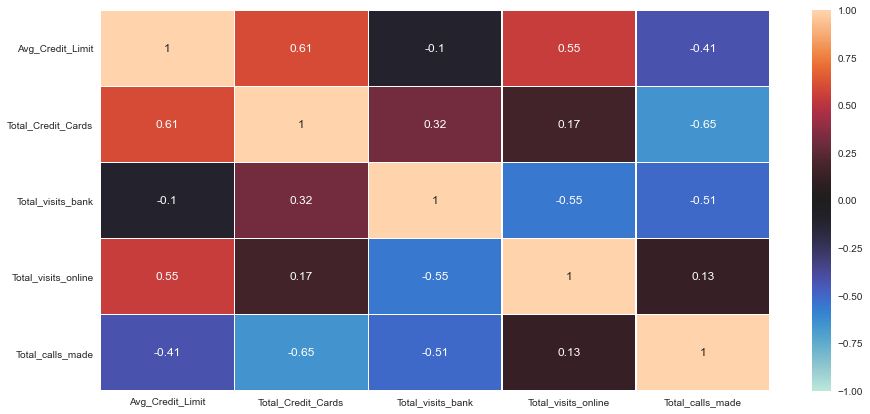

In [15]:
all_col = df.iloc[:,1:].columns.tolist()
plt.figure(figsize=(15,7))

sns.heatmap(df[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)

plt.show()

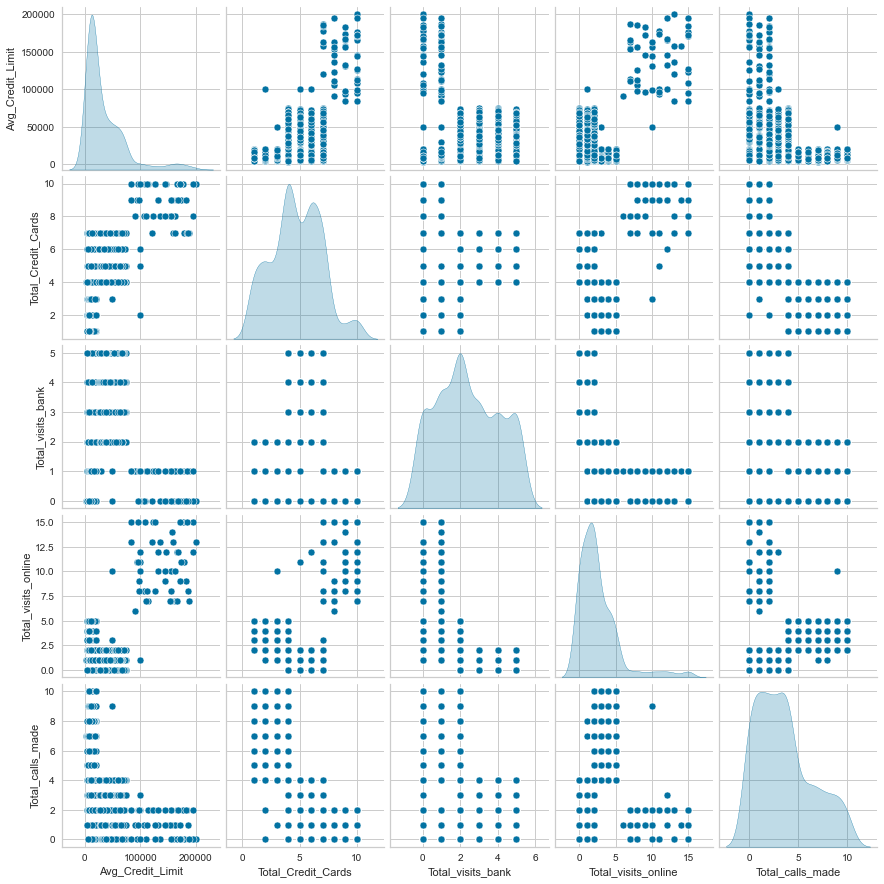

In [17]:
sns.pairplot(df[all_col],diag_kind="kde");

## Data Preprocessing:

In [50]:
df.duplicated().sum()

0

In [51]:
# Let us scale the data set prior to clustering
scaler=StandardScaler()
subset=df[all_col].copy()
subset_scaled=scaler.fit_transform(subset)

In [52]:
#Creating a dataframe from the scaled data above
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9907072114489897
Number of Clusters: 6 	Average Distortion: 0.9430237477837109
Number of Clusters: 7 	Average Distortion: 0.9095661498049182
Number of Clusters: 8 	Average Distortion: 0.8893409847213711


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

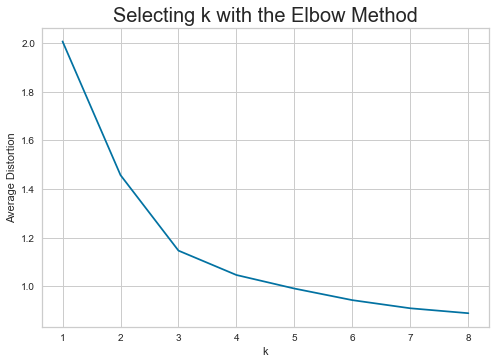

In [53]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

We understand an appropriate value of k from elbow curve seems to be 3. But we could also try with 4 and 5 since there are drastic changes from them as well.

In [55]:
#Checking silhoutte score
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41842496663215445)
For n_clusters = 3, silhouette score is 0.5157182558881063)
For n_clusters = 4, silhouette score is 0.3556670619372605)
For n_clusters = 5, silhouette score is 0.27239829454176767)
For n_clusters = 6, silhouette score is 0.2559173015668106)
For n_clusters = 7, silhouette score is 0.2493140218500744)
For n_clusters = 8, silhouette score is 0.2265228441964756)
For n_clusters = 9, silhouette score is 0.22038293089633512)


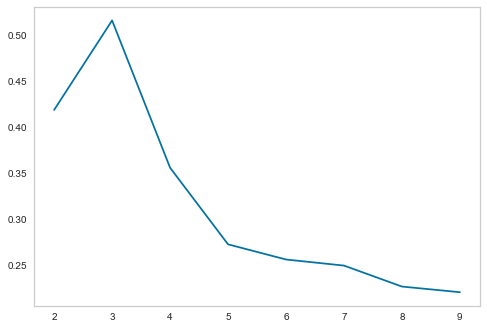

In [56]:
plt.plot(cluster_list,sil_score)
plt.grid()

Further to finding silhouette score, it seems that 4 is good value of k.

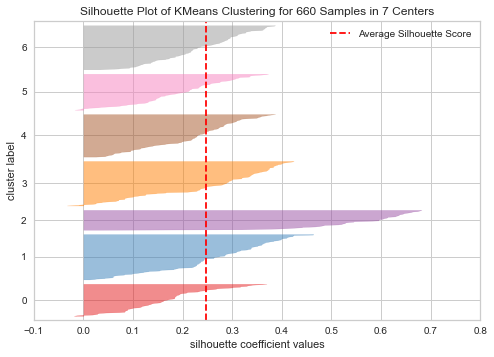

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [58]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state = 1))
visualizer.fit(subset_scaled_df);    
visualizer.show()

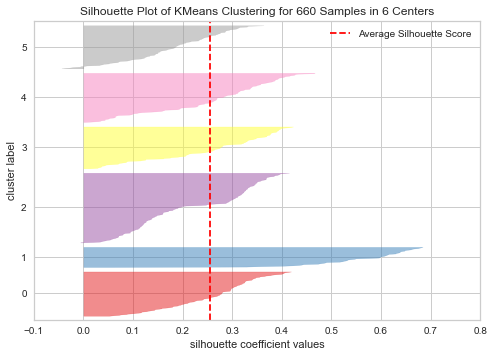

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

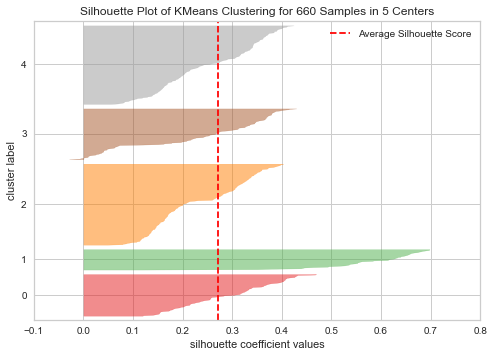

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

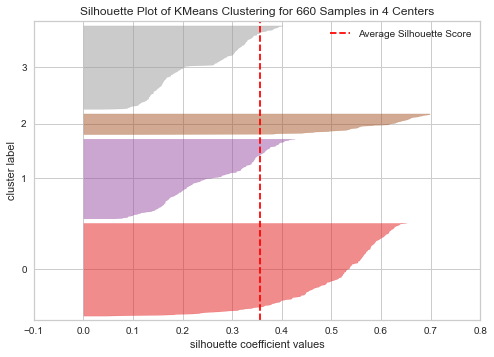

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [61]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

In [62]:
#Let us take 4 as appropriate no. of clusters as silhoutte score is high
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [63]:
df['K_means_segments'] = kmeans.labels_

In [64]:
cluster_profile = df.groupby('K_means_segments').mean()

In [65]:
cluster_profile['count_in_each_segment'] = df.groupby('K_means_segments')['Total_Credit_Cards'].count().values

In [67]:
cluster_profile.T

K_means_segments,0,1,2,3
Customer Key,55714.684211,55257.135747,56708.76,54071.849246
Avg_Credit_Limit,31226.315789,12167.420814,141040.00,35904.522613
Total_Credit_Cards,5.478947,2.393665,8.74,5.522613
Total_visits_bank,4.515789,0.927602,0.60,2.477387
Total_visits_online,1.010526,3.574661,10.90,0.969849
Total_calls_made,1.936842,6.923077,1.08,2.075377
count_in_each_segment,190.000000,221.000000,50.00,199.000000


In [68]:
#dropping the Customer Key. column as it does not hold any statistical significance
df.drop('Customer Key',axis=1,inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
 5   K_means_segments     660 non-null    int32
dtypes: int32(1), int64(5)
memory usage: 28.5 KB


In [70]:
# Scaling the data set before clustering
scaler=StandardScaler()
subset=df[all_col].copy()
subset_scaled=scaler.fit_transform(subset)

In [71]:
#Creating a dataframe from the scaled data above
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.990778179643084
Number of Clusters: 6 	Average Distortion: 0.9429744639017253
Number of Clusters: 7 	Average Distortion: 0.9094700983137036
Number of Clusters: 8 	Average Distortion: 0.8893209608573639


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

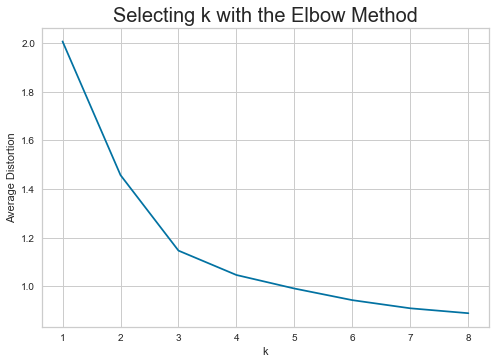

In [72]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

The appropriate value of k from elbow curve seems to be 3 , 4 or 5

In [74]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41842496663215445)
For n_clusters = 3, silhouette score is 0.5157182558881063)
For n_clusters = 4, silhouette score is 0.3556670619372605)
For n_clusters = 5, silhouette score is 0.2717470361089752)
For n_clusters = 6, silhouette score is 0.25583657571102003)
For n_clusters = 7, silhouette score is 0.24857211535274673)
For n_clusters = 8, silhouette score is 0.2270092493835933)
For n_clusters = 9, silhouette score is 0.22524644868024038)


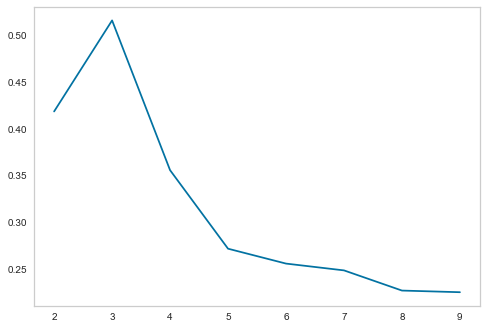

In [75]:
plt.plot(cluster_list,sil_score)
plt.grid()

* From silhouette score, it seems that 3, 4 is good value of k.

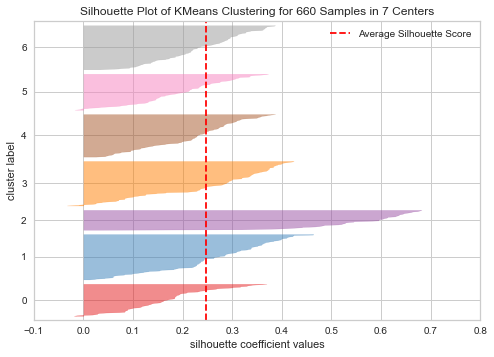

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [76]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

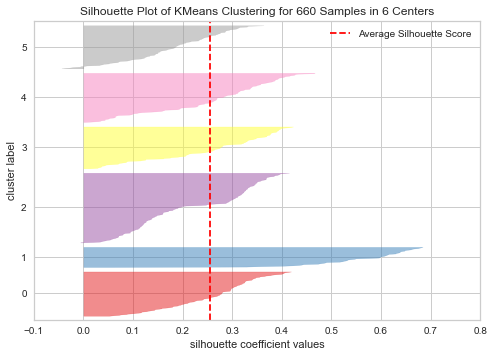

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [77]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

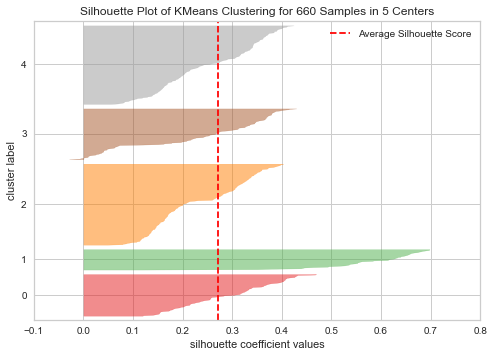

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [78]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

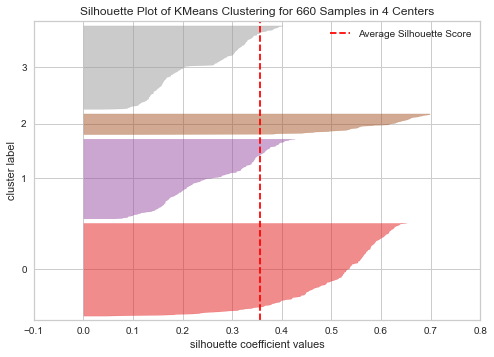

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [79]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

In [80]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [81]:
df['K_means_segments'] = kmeans.labels_

In [82]:
cluster_profile = df.groupby('K_means_segments').mean()

In [83]:
cluster_profile['count_in_each_segment'] = df.groupby('K_means_segments')['Avg_Credit_Limit'].count().values

In [85]:
cluster_profile.T

K_means_segments,0,1,2,3
Avg_Credit_Limit,31226.315789,12167.420814,141040.00,35904.522613
Total_Credit_Cards,5.478947,2.393665,8.74,5.522613
Total_visits_bank,4.515789,0.927602,0.60,2.477387
Total_visits_online,1.010526,3.574661,10.90,0.969849
Total_calls_made,1.936842,6.923077,1.08,2.075377
count_in_each_segment,190.000000,221.000000,50.00,199.000000


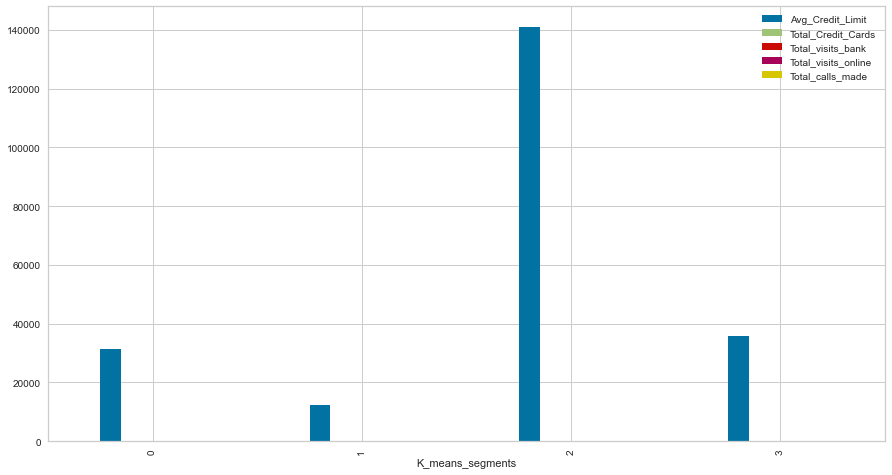

In [87]:
df.groupby('K_means_segments').mean().plot.bar(figsize=(15,8));

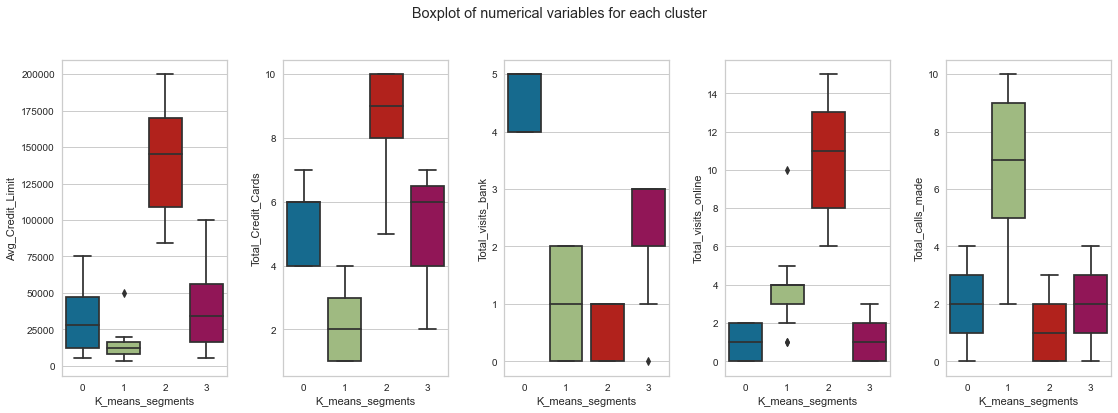

In [88]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

#### Inference:

- **Cluster 0**:
    - This cluster has average credit limit of less than 25,000
    - The total number of credit cards is of 1 to 3 in range 
    - The total visits to the bank is at the most 2 visits we can see  in this cluster 
    - The total visits via online is at the most 4 visits we can see in this cluster.
    - The total calls made ranges from 5 at the minimum upto around 9 calls in this cluster.
   
- **Cluster 1**:
  - This cluster has average credit limit ranges from 25,000 to above 50,000 but less than 75,000.
  - The total number of credit cards range starts at the maxiumum 5 in this cluster.
  - The total visits to the bank ranges between 2 to 3 in this cluster. 
  - The total visits via online is at the most 2 visits we can see in this cluster.
  - The total calls made ranges from 1 to 3 calls in this cluster.
     
    
  **Cluster 2**:
  - This cluster has average credit limit ranges higher than 100000 to 175 0000
  - The total number of credit cards is of 8 to 10 in range.
  - The total visits to the bank is at the most 1 visit only .
  - The total visits via online is at the 8 to 13  we can see in this cluster.
  - The total calls made ranges from 0 at the minimum upto around 2 calls in this cluster.
  
  
  **Cluster 3**:
  - This cluster has average credit limit of about below  50,000 in this cluster.
  - The total number of credit cards is of 4 to 6 in range 
  - The total visits to the bank is at the maximum 5 visits we can see  in this cluster 
  - The total visits via online is at the most 2 visits we can see in this cluster.
  - The total calls made ranges from 1 to 3 calls in this cluster
********************************************************************************************************************************

## Linkage Methods

In [89]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
distance_metrics = [ 'euclidean','chebyshev','mahalanobis','cityblock']
linkage_methods = ['single', 'complete', 'average', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
        print('Cophent correlation for distance metrics {} and linkahe method {} is {}'.format(dm,lm,c))
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
            

Cophent correlation for distance metrics euclidean and linkahe method single is 0.7391220243806552
Cophent correlation for distance metrics euclidean and linkahe method complete is 0.8599730607972423
Cophent correlation for distance metrics euclidean and linkahe method average is 0.8977080867389372
Cophent correlation for distance metrics euclidean and linkahe method weighted is 0.8861746814895477
Cophent correlation for distance metrics chebyshev and linkahe method single is 0.7382354769296767
Cophent correlation for distance metrics chebyshev and linkahe method complete is 0.8533474836336782
Cophent correlation for distance metrics chebyshev and linkahe method average is 0.8974159511838106
Cophent correlation for distance metrics chebyshev and linkahe method weighted is 0.8913624010768603
Cophent correlation for distance metrics mahalanobis and linkahe method single is 0.7058064784553606
Cophent correlation for distance metrics mahalanobis and linkahe method complete is 0.54227912098

In [90]:
print('Highest cophenet correlation is {}, which is obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Highest cophenet correlation is 0.8977080867389372, which is obtinaed with euclidean distance metric and average linkage method


Lets explore **'centroid', 'median','ward'** linkage method which requires only Euclidean distance metrics

In [91]:
linkage_methods = ['single', 'complete', 'average','median','ward', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric='euclidean', method=lm)
    c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
    print('Cophent correlation for distance metrics {} and linkahe method {} is {}'.format('euclidean',lm,c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = dm
        high_dm_lm[1] = lm
print('*'*110)
print('Highest cophenet correlation is {}, which is obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Cophent correlation for distance metrics euclidean and linkahe method single is 0.7391220243806552
Cophent correlation for distance metrics euclidean and linkahe method complete is 0.8599730607972423
Cophent correlation for distance metrics euclidean and linkahe method average is 0.8977080867389372
Cophent correlation for distance metrics euclidean and linkahe method median is 0.8893799537016724
Cophent correlation for distance metrics euclidean and linkahe method ward is 0.7415156284827493
Cophent correlation for distance metrics euclidean and linkahe method weighted is 0.8861746814895477
**************************************************************************************************************
Highest cophenet correlation is 0.8977080867389372, which is obtinaed with cityblock distance metric and average linkage method


#### Inference:
- We see that cophenet index is maximum with cityblock distance metric with manhattan distance method and average linkage method. 
- Lets see the dendrogram of different linkage method

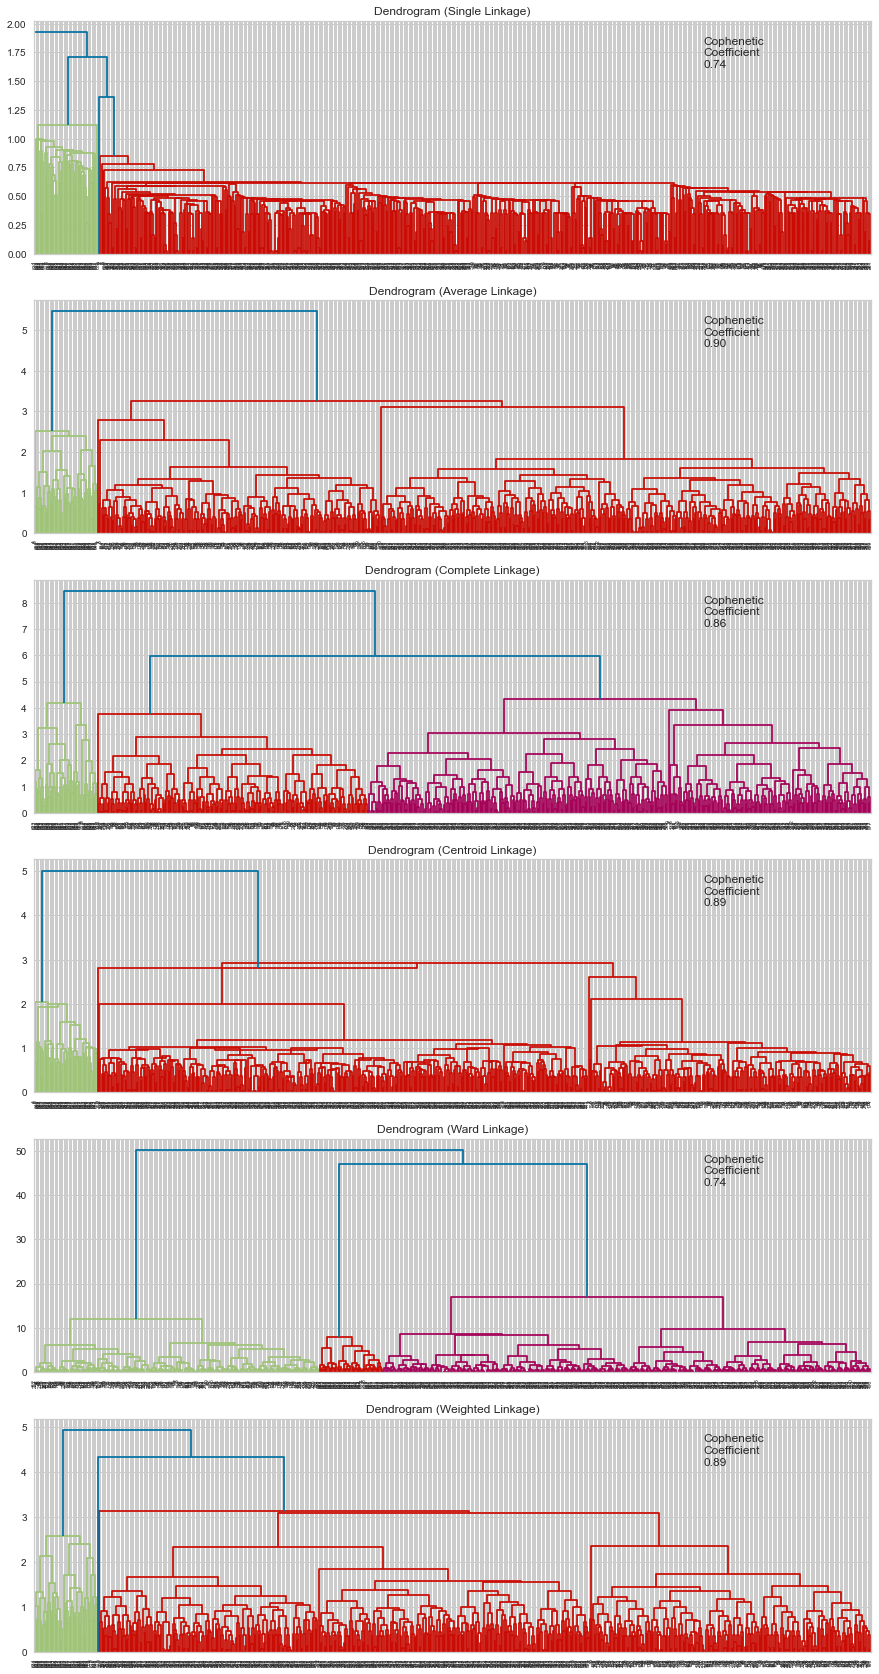

In [92]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_scaled_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
    compare.append([method, coph_corr])

#### Inference:
 - Dendrogram with ward linkage method shows distinct and separate cluster compared to other clusters

In [93]:
#Comparing Cophenetic Coefficient for each linkage
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.739122
1,average,0.897708
2,complete,0.859973
3,centroid,0.893939
4,ward,0.741516
5,weighted,0.886175


##### Let us see the dendrogram of 'mahalanobis','cityblock' with 'average', 'weighted' linkage method as they gave high cophenetic correlation value

In [94]:
distance_metrics = [ 'mahalanobis','cityblock']
linkage_methods = ['average', 'weighted']

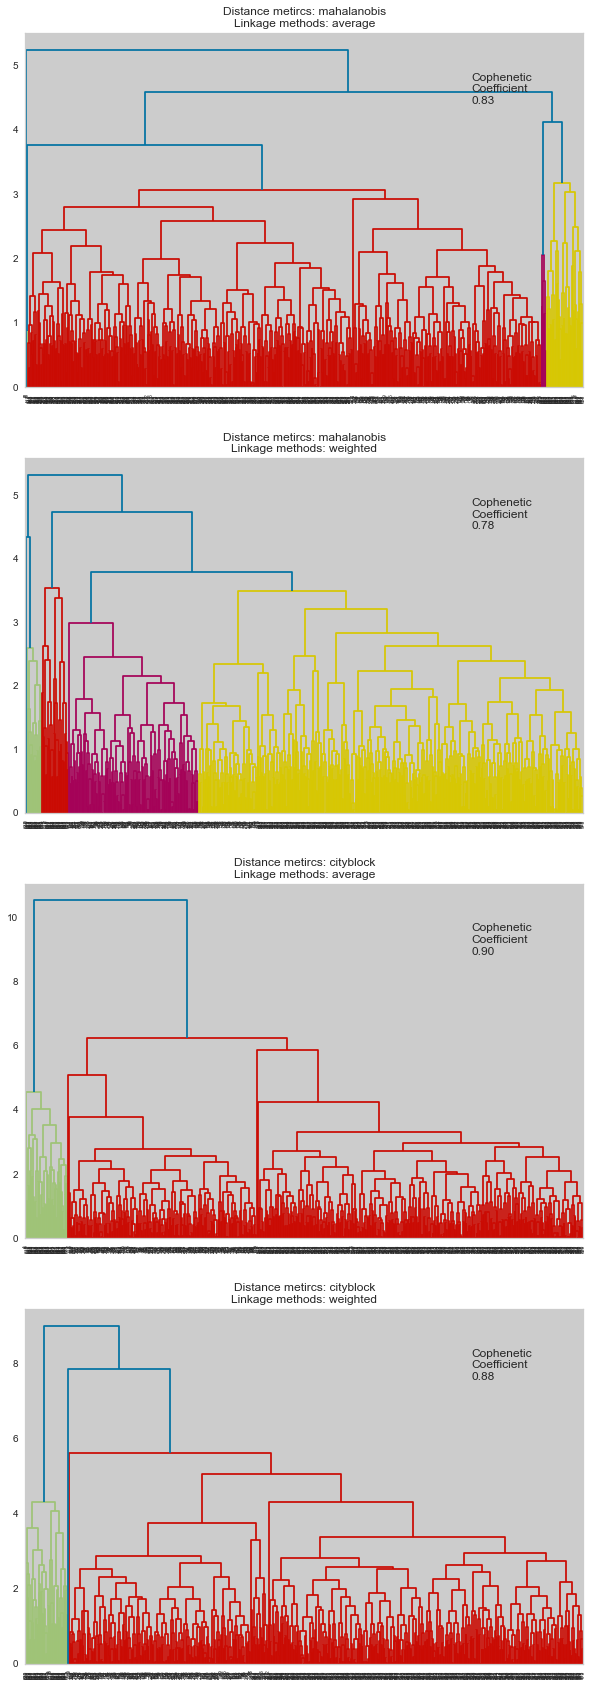

In [95]:
# Create a subplot image
fig, axs = plt.subplots(len(distance_metrics)+len(distance_metrics), 1, figsize=(10, 30))
i=0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        dendrogram(Z,  ax=axs[i]);
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))
        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                        (0.80, 0.80),
                        xycoords='axes fraction')
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))                        
        i +=1
       

#### Inference:
- Out of all the dendrogram we saw, it is clear that dendrogram with ward linkage method gave us separate and distinct clusters
- 4 cluster would be appropriate number of cluster from dendrogram with ward linkage method  

In [96]:
#Trying with K value as 4
HCmodel = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='ward')
HCmodel.fit(subset_scaled_df)
subset_scaled_df['HC_Clusters'] = HCmodel.labels_

In [97]:
df['HC_Clusters'] = HCmodel.labels_

In [98]:
cluster_profile = df.groupby('HC_Clusters').mean()

In [99]:
cluster_profile['count_in_each_segments'] = df.groupby('HC_Clusters')['Avg_Credit_Limit'].count().values

In [100]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,12151.111111,2.422222,0.937778,3.546667,6.857778,1.035556,225
1,38298.429319,5.670157,2.523560,0.947644,2.099476,2.890052,191
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
3,29474.226804,5.365979,4.448454,1.010309,1.891753,0.170103,194


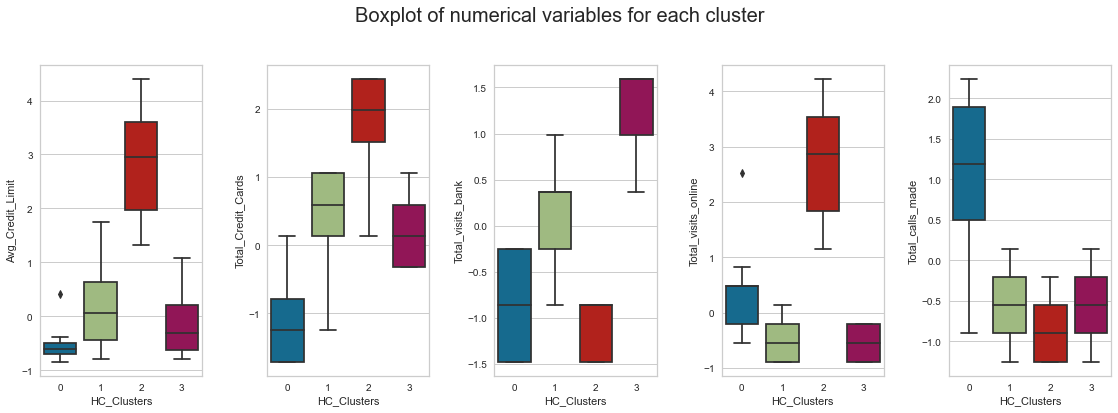

In [101]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_df[all_col[counter]],x=subset_scaled_df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

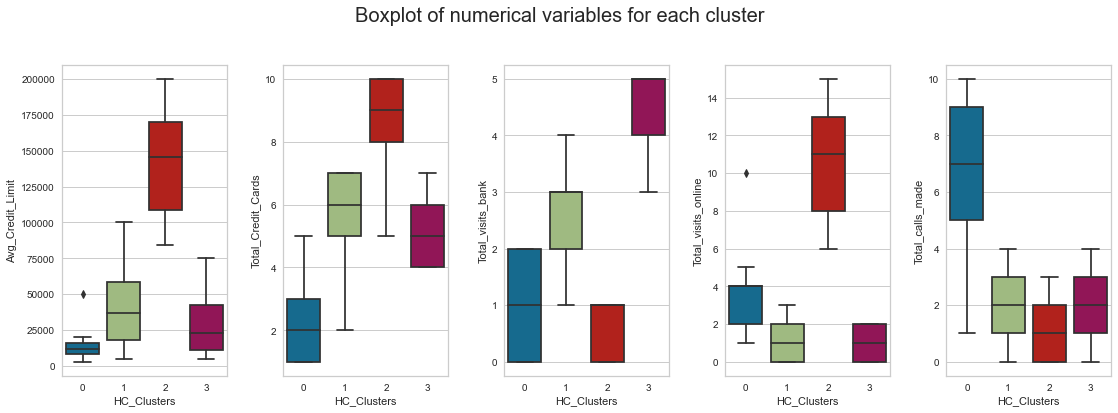

In [102]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

********************************************************************************************************************************
## Conclusion:

- **Cluster 0**:
    - This cluster has average credit limit of less than 25,000
    - The total number of credit cards is of 1 to 3 in range 
    - The total visits to the bank is at the most 2 visits we can see  in this cluster 
     - The total visits via online is at the most 4 visits we can see in this cluster.
     - The total calls made ranges from 5 at the minimum upto around 9 calls in this cluster.
   
- **Cluster 1**:
  - This cluster has average credit limit ranges from 25,000 to above 50,000 but less than 75,000.
    - The total number of credit cards range starts at the maxiumum 5 in this cluster.
    - The total visits to the bank ranges between 2 to 3 in this cluster. 
     - The total visits via online is at the most 2 visits we can see in this cluster.
     - The total calls made ranges from 1 to 3 calls in this cluster.
     
    
  **Cluster 2**:
  - This cluster has average credit limit ranges higher than 100000 to 175 0000
    - The total number of credit cards is of 8 to 10 in range.
    - The total visits to the bank is at the most 1 visit only .
     - The total visits via online is at the 8 to 13  we can see in this cluster.
     - The total calls made ranges from 0 at the minimum upto around 2 calls in this cluster.
  
  
  **Cluster 3**:
  - This cluster has average credit limit of about below  50,000 in this cluster.
    - The total number of credit cards is of 4 to 6 in range 
    - The total visits to the bank is at the maximum 5 visits we can see  in this cluster 
     - The total visits via online is at the most 2 visits we can see in this cluster.
     - The total calls made ranges from 1 to 3 calls in this cluster


In [70]:
pd.crosstab(df['HC_Clusters'], df.Avg_Credit_Limit).style.highlight_max(color = 'lightgreen', axis = 0)

Avg_Credit_Limit,3000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,25000,26000,27000,28000,29000,30000,31000,32000,33000,34000,35000,36000,37000,38000,39000,40000,41000,42000,43000,44000,45000,46000,47000,48000,49000,50000,51000,52000,54000,55000,56000,57000,58000,59000,60000,61000,62000,63000,64000,65000,66000,67000,68000,69000,70000,71000,72000,73000,74000,75000,84000,91000,94000,95000,96000,97000,98000,99000,100000,106000,108000,111000,112000,114000,121000,123000,126000,127000,131000,132000,136000,144000,145000,146000,153000,155000,156000,157000,158000,163000,166000,167000,171000,172000,173000,176000,178000,183000,184000,186000,187000,195000,200000
HC_Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,13,17,14,20,18,14,15,8,18,14,11,13,13,9,13,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,4,8,2,6,1,4,3,4,3,3,1,4,4,8,10,4,1,1,2,0,2,4,2,1,2,3,2,5,2,3,2,2,0,2,0,1,2,2,4,3,3,3,3,4,3,1,5,3,1,3,3,2,3,1,3,4,3,2,4,2,6,2,1,3,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,2,1,1,2,1,1,1,1,1,1,1,2,1
3,0,4,6,8,9,9,8,6,6,7,6,5,5,6,6,3,3,0,4,0,3,3,2,3,1,2,3,0,6,4,5,5,1,6,0,1,2,1,1,2,3,1,4,1,2,1,0,2,0,2,1,2,1,0,1,1,1,1,1,3,2,4,2,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


********************************************************************************************************************************
## Business Recommendation

- **Cluster 2**: Have a higher average credit limit and also seen that each customer have upto 8 to 10 credit cards to the maxinmum.
 - Therefore , the number of visits via online is higher but theie visits to bank is lower .
 - The reason most of these customers get a higher income and they the spend more and so they rely more visits online for easier payments.
 - They seldom do calls  or at the most 2 per day .

- **Cluster 1**: 
 - Next cluster after cluster3 to have higher credit card limit and usage of credit cards.
- Their bank visits are more compared to the online visits and online visits are 2 at the maximum.

- **Cluster 0**: 
- Have the lowest average spending limit among all clusters with less number of credit cards at the most 3 in the cluster .

- These cluster have a highest number of calls at the maximum 9 per day.

- **Cluster 3** :
- This cluster has a credit limit about less than 50,000 but number of credit cards used is about 6 at the maximum in lone after cluster 2.
